In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os




In [3]:
raw_data = pd.read_csv("Malwaredataset.csv")
raw_data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [4]:
raw_data.describe()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,499.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,999.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,0.0,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [6]:
data = raw_data

In [7]:
data["classification"].value_counts()

malware    50000
benign     50000
Name: classification, dtype: int64

In [8]:
data['classification'] = data.classification.map({'benign':0, 'malware':1})
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [9]:
# Shuffle data
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,4499a97e58677e7ee9fc7bd16f51b796b5fe28f87429e7...,245,1,4096,0,3069706240,22225,0,0,0,...,7,0,114,0,3204448256,382477,4,0,0,0
1,com.venticake.retrica.apk,293,0,0,0,3069575168,15776,0,0,0,...,3,0,120,0,3204448256,379875,3,1,0,0
2,Bible_apkpure.com.apk,168,0,0,0,3069227008,24345,0,0,0,...,17,2,114,0,3204448256,390548,4,0,0,0
3,com.figure1.android.apk,544,0,0,0,3070103552,15117,0,0,0,...,37,1,120,6,3204448256,378004,3,1,0,0
4,2f14c6999815d6a802a5106ed898554c22a6592ca37bd9...,27,1,4096,0,3069992960,14224,0,0,0,...,3,0,112,0,3204448256,380085,4,0,0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


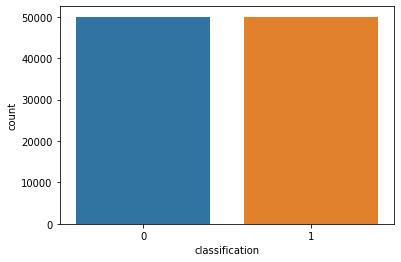

In [10]:
#Import drawing tools

import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data["classification"])
plt.show()

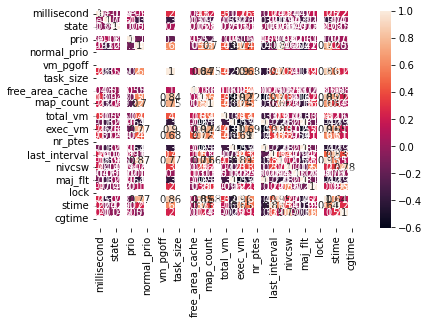

In [11]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [12]:
X = data.drop(['hash','classification','vm_truncate_count','shared_vm','exec_vm','nvcsw','maj_flt','utime'],axis=1)
Y = data['classification']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [16]:
import tensorflow as tf


In [17]:
#Number of attributes
input_size = 27 

#Number of Outputs
output_size = 2 

# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50
    
# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, input_shape=(input_size,), activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1400      
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 50)                2550      
                                                                 
 dense_6 (Dense)             (None, 2)                 1

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
# set the batch size
batch_size = 100

# set a maximum number of training epochs
max_epochs = 20

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [24]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=30,
                   verbose=1,
                   initial_epoch=10, #start from epoch 11
                   callbacks=[early_stopping], #prevent overfitting
                   validation_split=0.2)

Epoch 11/30
640/640 [==============================] - 6s 7ms/step - loss: 0.0850 - accuracy: 0.9668 - val_loss: 0.0168 - val_accuracy: 0.9954
Epoch 12/30
640/640 [==============================] - 2s 3ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.0035 - val_accuracy: 0.9987
Epoch 13/30
640/640 [==============================] - 2s 3ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 14/30
640/640 [==============================] - 2s 3ms/step - loss: 0.0029 - accuracy: 0.9992 - val_loss: 0.0014 - val_accuracy: 0.9994
Epoch 15/30
640/640 [==============================] - 2s 3ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9991
Epoch 16/30
640/640 [==============================] - 2s 3ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0029 - val_accuracy: 0.9986


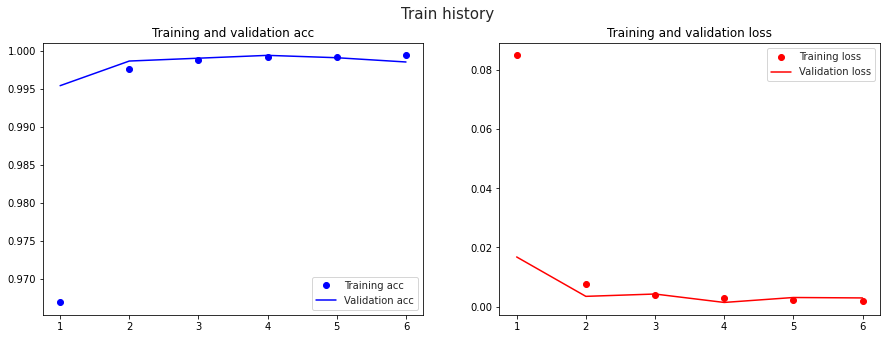

In [25]:
# Visualize the result
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.set_style("white")
plt.suptitle('Train history', size = 15)

ax1.plot(epochs, acc, "bo", label = "Training acc")
ax1.plot(epochs, val_acc, "b", label = "Validation acc")
ax1.set_title("Training and validation acc")
ax1.legend()

ax2.plot(epochs, loss, "bo", label = "Training loss", color = 'red')
ax2.plot(epochs, val_loss, "b", label = "Validation loss", color = 'red')
ax2.set_title("Training and validation loss")
ax2.legend()

plt.show()

In [26]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 0.9990

Test loss: 0.002097. Test accuracy: 99.900001%


In [27]:
from tensorflow.keras.optimizers import SGD


In [30]:
sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd, loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [31]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 1s 1ms/step - loss: 0.0021 - accuracy: 0.9990

Test loss: 0.002097. Test accuracy: 99.900001%


In [32]:
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=30,
                   verbose=1,
                   initial_epoch=10, #start from epoch 11
                   callbacks=[early_stopping], #prevent overfitting
                   validation_split=0.2)

Epoch 11/30
640/640 [==============================] - 2s 3ms/step - loss: 8.5891e-04 - accuracy: 0.9997 - val_loss: 0.0012 - val_accuracy: 0.9995
Epoch 12/30
640/640 [==============================] - 2s 3ms/step - loss: 7.5846e-04 - accuracy: 0.9997 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 13/30
640/640 [==============================] - 2s 3ms/step - loss: 6.8299e-04 - accuracy: 0.9998 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 14/30
640/640 [==============================] - 2s 2ms/step - loss: 6.6513e-04 - accuracy: 0.9998 - val_loss: 0.0011 - val_accuracy: 0.9997


In [33]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))

625/625 [==============================] - 1s 1ms/step - loss: 8.1728e-04 - accuracy: 0.9998

Test loss: 0.000817. Test accuracy: 99.975002%
